# pymofa tutorial
last updated: 2016-09-06

This notebook introduces the basic functionalities of pymofa, the python modeling framework to run and evaluate your models systematically ;)

In [1]:
# if you work with this notebook interactively, exectue

In [2]:
# cd ..

In [3]:
# to be at the pymofa root

In [4]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


## A discrete predetor prey dummy model
First we need to create a dummy model. Let's use a discrete version of the famous predator prey model.


In [5]:
def predprey_model(prey_birth_rate, prey_mortality, 
                   predator_efficiency, predator_death_rate,
                   initial_prey, initial_predators,
                   time_length):
    """Discrete predetor prey model."""
    A = -1 * np.ones(time_length)
    B = -1 * np.ones(time_length)
    A[0] = initial_prey
    B[0] = initial_predators
    for t in range(1, time_length):
        A[t] = A[t-1] + prey_birth_rate * A[t-1] - prey_mortality * B[t-1]*A[t-1]
        B[t] = B[t-1] + predator_efficiency * B[t-1]*A[t-1] - predator_death_rate * B[t-1] +\
            0.02 * (0.5 - np.random.rand())
    return A, B

**Example usage**:

In [6]:
preys, predators = predprey_model(0.1, 0.1, 0.1, 0.01, 1.0, 1.0, 1000)

<IPython.core.display.Javascript object>


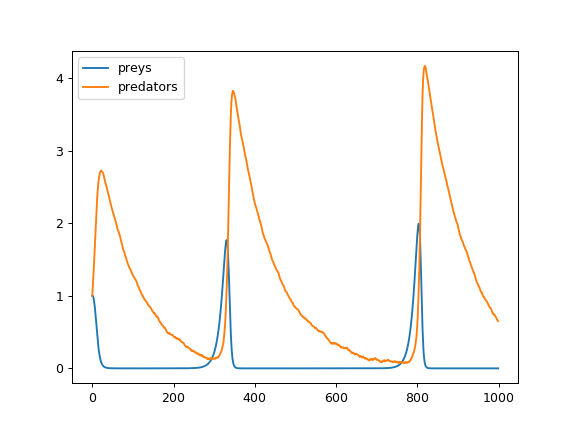

In [7]:
plt.plot(preys, label="preys") 
plt.plot(predators, label="predators")
plt.legend()

## Applying pymofa

In [8]:
cd ..

/home/wbarfuss/Documents/Work/Software/pymofa


In [9]:
# imports
from pymofa.experiment_handling import experiment_handling as eh
import itertools as it
# import cPickle

In [10]:
# Path where to Store the simulated Data
SAVE_PATH_RAW = "./rock"

In [11]:
# Definingh the experiment execution function
#      it gets paramater you want to investigate, plus `filename` as the last parameter
def RUN_FUNC(prey_birth_rate, coupling, predator_death_rate, initial_pop, time_length,
             store):  # <-- ich könnte hier die store function übergeben
    """Insightful docstring."""
    # poss. process
    prey_mortality = coupling
    predator_efficiency = coupling
    initial_prey = initial_pop
    initial_predators = initial_pop
    # one could also do more complicated stuff here, e.g. drawing something from a random distribution
    
    # running the model
    preys, predators = predprey_model(prey_birth_rate, prey_mortality, predator_efficiency,
                                      predator_death_rate, initial_prey, initial_predators,
                                      time_length)
    
    # preparing the data
    res = pd.DataFrame({"preys": np.array(preys),
                        "predators": np.array(predators)})
    res.index.name = "tstep"
    
    # return res
    store(res)
    
    #return res
    # Save Result
    #res.to_pickle(filename)
    
    # determine exit status (if something went wrong)
    # if exit status > 0 == run passen{i: RUN_FUNC.__code__.co_varnames[i] for i in range(len(RUN_FUNC.__code__.co_varnames)-1)}
    # if exit status < 0 == Run Failed
    
    # exit_status = 42
    
    # RUN_FUNC needs to return exit_status
    
    # return exit_status

In [12]:
runfunc_output = pd.DataFrame(columns=["predators", "preys"])
runfunc_output.index.name = "tstep"

## tmp: new data handling tests

NOTE to myself: Runfuc output should be given to pymofa handle

In [13]:
def get_store_index_names():
    """
    """
    
    param_names = RUN_FUNC.__code__.co_varnames[:RUN_FUNC.__code__.co_argcount-1]
    mix_names = param_names + ("sample",) + tuple(runfunc_output.index.names)

    return mix_names

In [14]:
get_store_index_names()

('prey_birth_rate',
 'coupling',
 'predator_death_rate',
 'initial_pop',
 'time_length',
 'sample',
 'tstep')

In [15]:
def store(run_func_result, pcs):
    """
    store the run func result
    TODO: posss. better doc string
    
    Parameters
    -----------
    pcs : tuple
        (pc, c) with pc=parameter combination (iterab. of floats) and s=sample (int)
    """
    
    # ID : the current parameter combinations + sample
    ID = [[p] for p in pcs[0]] + [[pcs[1]]] # last one is sample

    mix = pd.MultiIndex.from_product(ID + [run_func_result.index.values], 
                                     names=get_store_index_names())

    mrfs = pd.DataFrame(data=run_func_result.values,
                        index=mix, columns=run_func_result.columns)

    with pd.HDFStore("store.h5", mode="a") as store:
        store.append("dat", mrfs)
        # print(store)
    
    # append mrfs to wdf
    

    

## continuing with pymofa

In [16]:
# Parameter combinations to investiage
prey_birth_rate = [0.09, 0.1, 0.11]
coupling = [0.1]
predator_death_rate = [0.005, 0.01, 0.05, 0.1]
initial_pop = [1.0, 2.0]
time_length = [1000]

PARAM_COMBS = list(it.product(prey_birth_rate, coupling, predator_death_rate, initial_pop, time_length))

In [17]:
# Sample Size
SAMPLE_SIZE = 3

In [18]:
# INDEX 
INDEX = {i: RUN_FUNC.__code__.co_varnames[i] for i in range(RUN_FUNC.__code__.co_argcount-1)}

In [19]:
# initiate handle instance with experiment variables
handle = eh(SAMPLE_SIZE, PARAM_COMBS, INDEX, RUN_FUNC, runfunc_output, SAVE_PATH_RAW)

initializing pymofa experiment handle
detected 1 nodes in MPI environment


In [20]:
# Compute experiemnts raw data
handle.compute()

72 of 72 single computations left
Only one node available. No parallel execution.
Saving rawdata at /home/wbarfuss/Documents/Work/Software/pymofa/rock.h5
['tstep']
['tstep']
True
Index(['predators', 'preys'], dtype='object')
Index(['predators', 'preys'], dtype='object')
[ True  True]
['tstep']
['tstep']
True
Index(['predators', 'preys'], dtype='object')
Index(['predators', 'preys'], dtype='object')
[ True  True]
['tstep']
['tstep']
True
Index(['predators', 'preys'], dtype='object')
Index(['predators', 'preys'], dtype='object')
[ True  True]
['tstep']
['tstep']
True
Index(['predators', 'preys'], dtype='object')
Index(['predators', 'preys'], dtype='object')
[ True  True]
['tstep']
['tstep']
True
Index(['predators', 'preys'], dtype='object')
Index(['predators', 'preys'], dtype='object')
[ True  True]


/home/wbarfuss/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()
/home/wbarfuss/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in double_scalars
  if sys.path[0] == '':
/home/wbarfuss/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':


['tstep']
['tstep']
True
Index(['predators', 'preys'], dtype='object')
Index(['predators', 'preys'], dtype='object')
[ True  True]
['tstep']
['tstep']
True
Index(['predators', 'preys'], dtype='object')
Index(['predators', 'preys'], dtype='object')
[ True  True]
['tstep']
['tstep']
True
Index(['predators', 'preys'], dtype='object')
Index(['predators', 'preys'], dtype='object')
[ True  True]
['tstep']
['tstep']
True
Index(['predators', 'preys'], dtype='object')
Index(['predators', 'preys'], dtype='object')
[ True  True]
['tstep']
['tstep']
True
Index(['predators', 'preys'], dtype='object')
Index(['predators', 'preys'], dtype='object')
[ True  True]
['tstep']
['tstep']
True
Index(['predators', 'preys'], dtype='object')
Index(['predators', 'preys'], dtype='object')
[ True  True]
['tstep']
['tstep']
True
Index(['predators', 'preys'], dtype='object')
Index(['predators', 'preys'], dtype='object')
[ True  True]
['tstep']
['tstep']
True
Index(['predators', 'preys'], dtype='object')
Index(['pred

['tstep']
['tstep']
True
Index(['predators', 'preys'], dtype='object')
Index(['predators', 'preys'], dtype='object')
[ True  True]
['tstep']
['tstep']
True
Index(['predators', 'preys'], dtype='object')
Index(['predators', 'preys'], dtype='object')
[ True  True]
['tstep']
['tstep']
True
Index(['predators', 'preys'], dtype='object')
Index(['predators', 'preys'], dtype='object')
[ True  True]
Splitting calculations to 0 nodes.
Calculating 0 ...done.


In [36]:

with pd.HDFStore("store.h5") as store:
    dat = store.select("dat", "initial_pop=2.0 & tstep>10 & tstep < 13 & prey_birth_rate =0.11")

dat


predators  \
prey_birth_rate coupling predator_death_rate initial_pop time_length sample tstep              
0.11            0.1      0.005               2.0         1000        0      11      4.830332   
                                                                            12      4.833340   
                         0.010               2.0         1000        0      11      4.633809   
                                                                            12      4.611048   
                         0.050               2.0         1000        0      11      3.352454   
                                                                            12      3.249033   
                         0.100               2.0         1000        0      11      2.245731   
                                                                            12      2.111206   
                         0.005               2.0         1000        1      11      4.808203   
                                                                            12      4.820486   
                         0.010               2.0         1000        1      11      4.619656   
                                                                            12      4.605685   
                         0.050               2.0         1000        1      11      3.366346   
                                                                            12      3.249530   
                         0.100               2.0         1000        1      11      2.230208   
                                                                            12      2.092713   
                         0.005               2.0         1000        2      11      4.846349   
                                                                            12      4.856844   
                         0.010               2.0         1000        2      11      4.633081   
                                                                            12      4.617681   
                         0.050               2.0         1000        2      11      3.358413   
                                                                            12      3.244199   
                         0.100               2.0         1000        2      11      2.238843   
                                                                            12      2.101827   

                                                                                      preys  
prey_birth_rate coupling predator_death_rate initial_pop time_length sample tstep            
0.11            0.1      0.005               2.0         1000        0      11     0.062529  
                                                                            12     0.039204  
                         0.010               2.0         1000        0      11     0.071043  
                                                                            12     0.045938  
                         0.050               2.0         1000        0      11     0.172362  
                                                                            12     0.133538  
                         0.100               2.0         1000        0      11     0.386512  
                                                                            12     0.342229  
                         0.005               2.0         1000        1      11     0.063509  
                                                                            12     0.039958  
                         0.010               2.0         1000        1      11     0.072691  
                                                                            12     0.047106  
                         0.050               2.0         1000        1      11     0.172017  
                                                                            12     0.133032  
                         0.100               2.0         1000        1      11    

In [17]:
rm -r dummy/